In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Búsqueda binaria

In [54]:
def busqueda_binaria(x1, x2, f, tol):
    if (f(x1) < 0 and f(x2) > 0) or (f(x1) > 0 and f(x2) < 0):
        while True:
            x_prim = 0.5 * (x1 + x2)
            if f(x_prim) * f(x2) > 0:
                x2 = x_prim
            elif f(x_prim) * f(x1) > 0:
                x1 = x_prim
            res = abs(x1 - x2)
            if res < tol:
                return x_prim  # Devuelve la raíz encontrada
    else:
        print("x1 y x2 tienen que tener diferente signo")
        return None

In [53]:
funcion = lambda x: 5 * math.exp(-x) + x - 5
tolerancia = 1e-5
x1 = 1
x2 = -2
raiz_b = busqueda_binaria(x1, x2, funcion, tolerancia)
print(raiz_b)

-1.9073486328125e-06


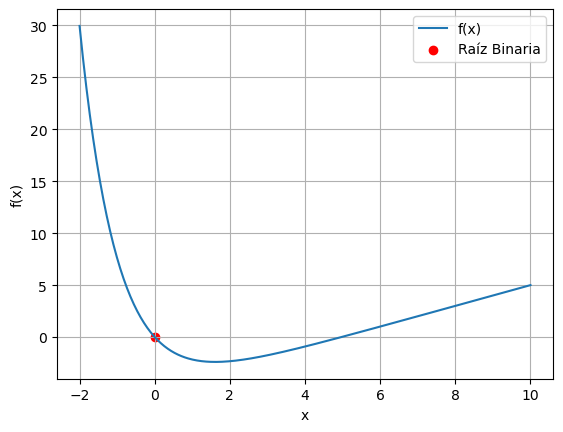

La raíz encontrada es: -1.9073486328125e-06


In [51]:
# Crear un conjunto de valores x para la gráfica
x_valores = np.linspace(-2, 10, 400)
y_valores = [funcion(x) for x in x_valores]

# Graficar la función
plt.plot(x_valores, y_valores, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')

# Marcar la raíz encontrada en la gráfica
plt.scatter(raiz_b, funcion(raiz_b), color='red', label='Raíz Binaria', marker='o')
plt.legend()

# Mostrar la gráfica
plt.grid()
plt.show()

print("La raíz encontrada es:", raiz_b)

## Método de Newton-Raphson

In [46]:
def newton_raphson(f, f_prime, x0, tol, max_i):
    x = x0
    i = 0

    while i < max_i:
        x_n = x - f(x) / f_prime(x)
        if abs(x_n - x) < tol:
            return x_n  
        x = x_n
        i += 1

    print("El Método de Newton-Raphson no convergió después de", max_i, "iteraciones.")
    return None

In [47]:
funcion = lambda x: 5 * math.exp(-x) + x - 5
funcion_derivada = lambda x: 5 * math.exp(-x) + 1

x0 = 1
tolerancia = 1e-5
max_i = 100

raiz = newton_raphson(funcion, funcion_derivada, x0, tolerancia, max_i)

if raiz is not None:
    print("La raíz encontrada es:", raiz)
else:
    print("El método no convergió.")

La raíz encontrada es: -3.1789138827448743e-06


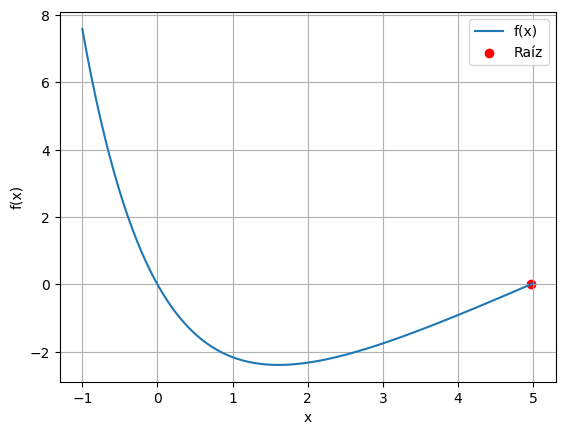

La raíz encontrada es: 4.965114154076446


In [40]:
x_valores = np.linspace(-1, 5, 400)
y_valores = [funcion(x) for x in x_valores]

plt.plot(x_valores, y_valores, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.scatter(raiz, funcion(raiz), color='red', label='Raíz', marker='o')
plt.legend()

plt.grid()
plt.show()

if raiz is not None:
    print("La raíz encontrada es:", raiz)
else:
    print("El método no convergió.")

En resumen, la elección entre el método de búsqueda binaria y el Método de Newton-Raphson depende de las condiciones iniciales y la naturaleza de la función objetivo. El Método de Newton-Raphson tiende a ser más eficiente y convergente cuando se tiene una suposición inicial cercana a la raíz y la función es suave y bien comportada. Por otro lado, la búsqueda binaria es más robusta y puede converger en una variedad más amplia de situaciones, aunque a expensas de una convergencia más lenta. 
En nuestro caso en el método de búsqueda binaria nos falto encontrar los demas ceros, pero en la grafica podemos ver que si existen más y es el encontrado en con el el Método de Newton-Raphson.